In [1]:
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
## Shows the plots inline, instead of in a separate window:
%matplotlib inline

# fit_identifier="2BB-FS-G-kT-fzs-fzNbb8857-2"
# title = "PHABS$\\times$ (SIMPLER * DISKBB + BBODYRAD + GAUSS)"
# fit_identifier="1BB-FS-G-Tin-fzs-fzNbb"
# title = "PHABS$\\times$ (SIMPLER * DISKBB + GAUSS)"
fit_identifier="pBB-FS-G-p-fzs-fzNbb"
title = "PHABS$\\times$ (SIMPLER * DISKPBB + GAUSS)"

phase_points_file = fit_identifier + "_phasepoints.txt"
plot_file = "/Users/abigailstevens/Dropbox/Research/CCF_paper1/GX339-BQPO_151204_" + fit_identifier + "_dphase_hist.eps"
phase_points = np.loadtxt(phase_points_file)
print np.shape(phase_points)
# Should be PL gamma, PL norm, BB temp

(3, 5530)


In [2]:
mean_phase = np.mean(phase_points, axis=1)
err_phase = np.sqrt(np.var(phase_points, axis=1, ddof=1))
print mean_phase
print err_phase

[-0.16963587 -0.20471191  0.09312934]
[ 0.00598019  0.00327181  0.01648605]


In [3]:
dphase_gamma = phase_points[0,:] - phase_points[1,:]
dphase_bbody = phase_points[2,:] - phase_points[1,:]
mean_dphase_gamma = np.mean(dphase_gamma)
mean_dphase_bbody = np.mean(dphase_bbody)
err_dphase_gamma = np.sqrt(np.var(dphase_gamma, ddof=1))
err_dphase_bbody = np.sqrt(np.var(dphase_bbody, ddof=1))

print "Gamma dphase: %.4f +- %.5f" % (mean_dphase_gamma, err_dphase_gamma)
print "BBody dphase: %.4f +- %.5f" % (mean_dphase_bbody, err_dphase_bbody)

Gamma dphase: 0.0351 +- 0.00356
BBody dphase: 0.2978 +- 0.01519


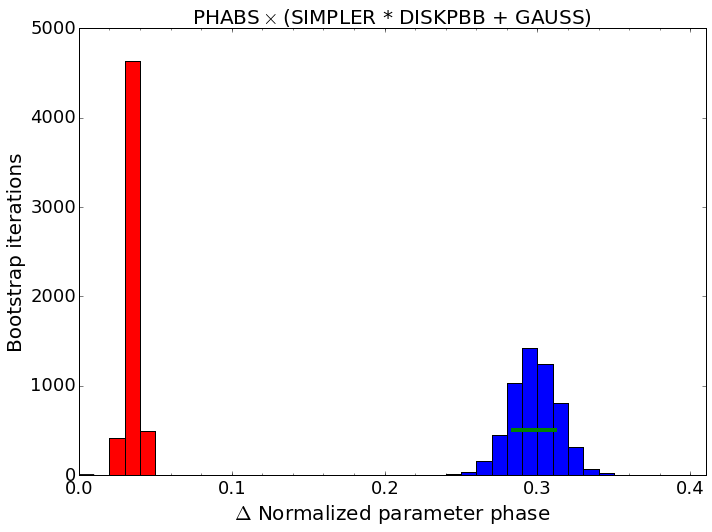

In [10]:
xLocator = MultipleLocator(0.02)  ## loc of minor ticks on x-axis
font_prop = font_manager.FontProperties(size=20)

fig, ax = plt.subplots(1, 1, figsize=(10, 7.5), dpi=300, tight_layout=True)
bins_1, edges_1, patches_1 = ax.hist(dphase_gamma, bins=100, range=[0, 1],
        facecolor='red')
bins_2, edges_2, patches_2 = ax.hist(dphase_bbody, bins=100, range=[0, 1],
        facecolor='blue')
ax.hlines(500, mean_dphase_bbody-err_dphase_bbody, mean_dphase_bbody+err_dphase_bbody, color='green', lw=4)
ax.set_xlabel(r'$\Delta$ Normalized parameter phase',
        fontproperties=font_prop)
ax.set_ylabel('Bootstrap iterations', fontproperties=font_prop)
ax.set_xlim(0, 0.41)
ax.set_ylim(0, 5000)
ax.set_xticks(np.arange(0, 0.41, 0.1))
ax.xaxis.set_minor_locator(xLocator)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title(r'%s' % title, fontproperties=font_prop)
plt.savefig(plot_file)
plt.show()